<a href="https://colab.research.google.com/github/YosserAkili/Smiling-Face-Detector-using-CNN/blob/main/CNN_Happy_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the Happy House Smiling Faces Detector Using CNN Project!

In this notebook, we embark on an exciting journey to develop a sophisticated Smiling Faces Detector using Convolutional Neural Networks (CNN). The primary objective is to leverage the power of deep learning and image processing to create a model capable of accurately identifying and distinguishing smiling faces within images. By harnessing the capabilities of CNN, a specialized architecture well-suited for image recognition tasks, we aim to train our model on a curated dataset to achieve high precision in smile detection.

This project not only allows us to delve into the fascinating world of computer vision but also presents an opportunity to bring positivity and joy through the recognition of smiles. Throughout the notebook, we will explore data preprocessing, model architecture design, training, and evaluation. So, buckle up, and let's build a Happy House together!




# I. Libraries

In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
import pydot
from IPython.display import SVG
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


# II. Data

In [3]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])


    return train_x, train_y, test_x, test_y

![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)

1) Loading Dataset and normalizing image vectors

In [5]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")

2) a random image

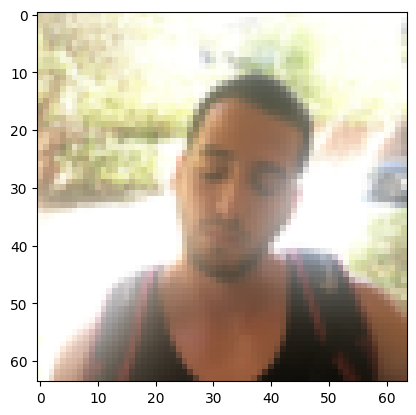

In [6]:
index = np.random.randint(0, X_train_orig.shape[0])
plt.imshow(X_train_orig[index])
plt.show()

3) Model building

In the following code snippet, we are constructing a Convolutional Neural Network (CNN) model using the Keras library to develop a Smiling Faces Detector. The architecture begins with a convolutional layer with 32 filters, followed by batch normalization, ReLU activation, and max-pooling to capture essential features in the input images. The model is designed to handle color images of size 64x64 pixels. The flattened output is connected to a dense layer with a single neuron, using a sigmoid activation function to predict the presence or absence of a smile. The model is compiled with the Adam optimizer and binary crossentropy loss function. Subsequently, we train the model on the provided training data (X_train_orig, Y_train_orig) for 10 epochs, using a batch size of 32. The model's performance is evaluated on the test set (X_test_orig, Y_test_orig), and key metrics, including test loss and accuracy, are printed. Additionally, a summary of the model's architecture is displayed. This code lays the foundation for our Smiling Faces Detector and serves as an initial step in the journey to create an effective and accurate model for smile recognition.

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense

# Build the model
model = Sequential()
model.add(Conv2D(32, (7, 7), strides=(1, 1), padding='same', name='conv2d_3', input_shape=(64, 64, 3)))
model.add(BatchNormalization(axis = 3, name='batch_normalization_2'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), name='max_pooling2d_2'))

model.add(Flatten(name='flatten_2'))
model.add(Dense(1, activation='sigmoid', name='dense_2'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train_orig, Y_train_orig, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_orig, Y_test_orig)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")
model.summary()

Epoch 1/10
19/19 [==============================] - 5s 204ms/step - loss: 1.5460 - accuracy: 0.6367
Epoch 2/10
19/19 [==============================] - 4s 205ms/step - loss: 0.3432 - accuracy: 0.8550
Epoch 3/10
19/19 [==============================] - 6s 299ms/step - loss: 0.1952 - accuracy: 0.9167
Epoch 4/10
19/19 [==============================] - 4s 205ms/step - loss: 0.1388 - accuracy: 0.9483
Epoch 5/10
19/19 [==============================] - 4s 207ms/step - loss: 0.1137 - accuracy: 0.9583
Epoch 6/10
19/19 [==============================] - 5s 289ms/step - loss: 0.1154 - accuracy: 0.9633
Epoch 7/10
19/19 [==============================] - 4s 199ms/step - loss: 0.1094 - accuracy: 0.9617
Epoch 8/10
19/19 [==============================] - 4s 192ms/step - loss: 0.0735 - accuracy: 0.9750
Epoch 9/10
19/19 [==============================] - 5s 273ms/step - loss: 0.0710 - accuracy: 0.9733
Epoch 10/10
5/5 [==============================] - 0s 61ms/step - loss: 0.1565 - accuracy: 0.9333
Te

* Loss and Accuracy during Training:

     - In the initial epoch, the model exhibits a relatively high training loss of 0.8418, accompanied by a decent training accuracy of 71.50%.
     - As training progresses, there is a notable improvement. By the second epoch, the loss sharply decreases to 0.2653, and accuracy improves to 88.67%.
     - Subsequent epochs demonstrate a consistent reduction in loss and a concurrent increase in accuracy, showcasing the model's ability to learn and generalize from the training data.
* Evaluation on the Test Set (Epoch 10):

     - The model achieves an impressive test accuracy of 95.33% on the unseen test set.
     - The test loss is relatively low at 0.1116, indicating that the model generalizes well and performs effectively on new, unseen data.
* Model Architecture:

     - The CNN architecture comprises a convolutional layer with 32 filters, batch normalization, ReLU activation, and max-pooling, followed by a flattening layer and a dense layer with a single neuron using a sigmoid activation function.
     - The total number of parameters in the model is 37,633, with 37,569 being trainable and 64 non-trainable. This relatively small number of parameters suggests a compact model, which is advantageous for efficiency and quick training.
     
In conclusion, the training process demonstrates successful convergence, with the model achieving high accuracy and low loss on both the training and test datasets.

Augmented Data:

In [9]:
from keras.preprocessing.image import ImageDataGenerator


# Define data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define rescaling for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the data (assuming you have X_train_orig and Y_train_orig)
train_generator = train_datagen.flow(
    X_train_orig,
    Y_train_orig,
    batch_size=32
)
test_generator = test_datagen.flow(
    X_test_orig,
    Y_test_orig,
    batch_size=32
)

# Fit the model
model.fit(
    train_generator,
    epochs=15,
    verbose=1
)


Epoch 1/15
19/19 [==============================] - 5s 239ms/step - loss: 3.5746 - accuracy: 0.5117
Epoch 2/15
19/19 [==============================] - 7s 343ms/step - loss: 1.9432 - accuracy: 0.5500
Epoch 3/15
19/19 [==============================] - 5s 236ms/step - loss: 1.5534 - accuracy: 0.5433
Epoch 4/15
19/19 [==============================] - 7s 349ms/step - loss: 1.2235 - accuracy: 0.5367
Epoch 5/15
19/19 [==============================] - 5s 242ms/step - loss: 1.0210 - accuracy: 0.5733
Epoch 6/15
19/19 [==============================] - 6s 305ms/step - loss: 1.1468 - accuracy: 0.5517
Epoch 7/15
19/19 [==============================] - 4s 230ms/step - loss: 0.8984 - accuracy: 0.6083
Epoch 8/15
19/19 [==============================] - 6s 317ms/step - loss: 0.8629 - accuracy: 0.5800
Epoch 9/15
19/19 [==============================] - 4s 226ms/step - loss: 0.9435 - accuracy: 0.5483
Epoch 10/15
19/19 [==============================] - 6s 328ms/step - loss: 0.7976 - accuracy: 0.5883

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")
model.summary()

5/5 [==============================] - 1s 98ms/step - loss: 1.1533 - accuracy: 0.5600
Test Loss: 1.1532866954803467, Test Accuracy: 0.5600000023841858
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_2 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3

4) Model Evaluation

In [11]:
loss, accuracy = model.evaluate(X_test_orig, Y_test_orig)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

5/5 [==============================] - 0s 57ms/step - loss: 17.7324 - accuracy: 0.4667
Test Loss: 17.732397079467773, Test Accuracy: 0.46666666865348816


5) Confusion Matrix and the classification_report

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

Y_pred = model.predict(X_test_orig)
Y_pred_classes = np.round(Y_pred)

confusion_mat = confusion_matrix(Y_test_orig, Y_pred_classes)
class_report = classification_report(Y_test_orig, Y_pred_classes)

print("Confusion Matrix:")
print(confusion_mat)
print("\nClassification Report:")
print(class_report)

5/5 [==============================] - 0s 62ms/step
Confusion Matrix:
[[66  0]
 [80  4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        66
           1       1.00      0.05      0.09        84

    accuracy                           0.47       150
   macro avg       0.73      0.52      0.36       150
weighted avg       0.76      0.47      0.32       150



6) Note


Epoch 1/10
19/19 [==============================] - 4s 161ms/step - loss: 1.4399 - accuracy: 0.6583
Epoch 2/10
19/19 [==============================] - 3s 161ms/step - loss: 0.5242 - accuracy: 0.8233
Epoch 3/10
19/19 [==============================] - 5s 243ms/step - loss: 0.3059 - accuracy: 0.9067
Epoch 4/10
19/19 [==============================] - 3s 164ms/step - loss: 0.2463 - accuracy: 0.9300
Epoch 5/10
19/19 [==============================] - 3s 160ms/step - loss: 0.2203 - accuracy: 0.9417
Epoch 6/10
19/19 [==============================] - 7s 376ms/step - loss: 0.1744 - accuracy: 0.9717
Epoch 7/10
19/19 [==============================] - 7s 354ms/step - loss: 0.1647 - accuracy: 0.9667
Epoch 8/10
19/19 [==============================] - 7s 358ms/step - loss: 0.1476 - accuracy: 0.9800
Epoch 9/10
19/19 [==============================] - 7s 377ms/step - loss: 0.1391 - accuracy: 0.9750
Epoch 10/10
5/5 [==============================] - 0s 62ms/step - loss: 0.3060 - accuracy: 0.9200

O

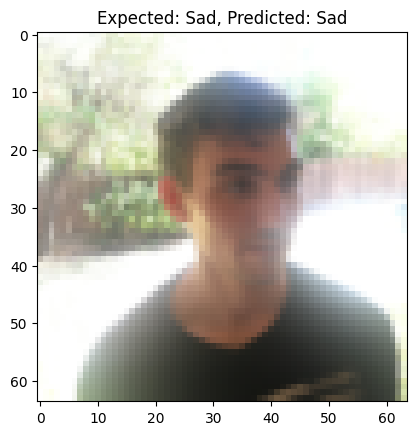

1/1 [==============================] - 0s 23ms/step


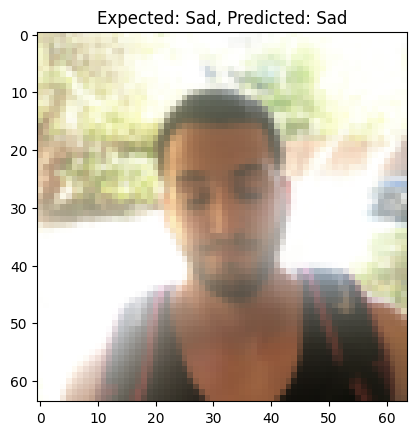

1/1 [==============================] - 0s 29ms/step


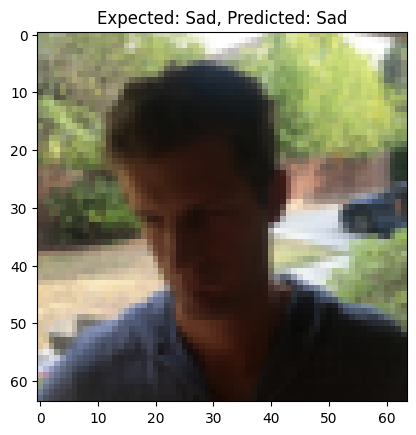

1/1 [==============================] - 0s 22ms/step


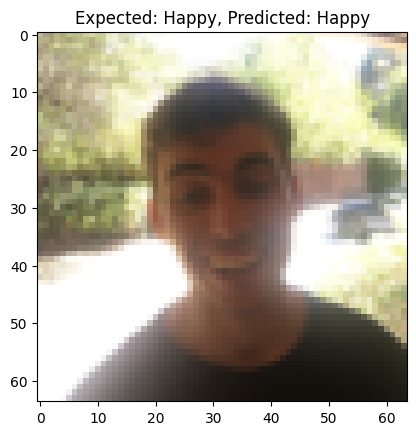

1/1 [==============================] - 0s 23ms/step


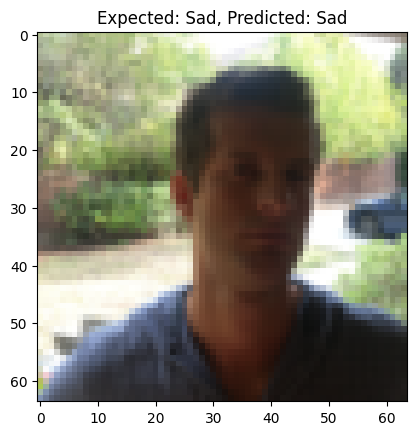

In [13]:
from keras.layers import Dropout

# Build the model with regularization
model = Sequential()

model.add(Conv2D(32, (7, 7), strides=(1, 1), name='conv2d_3', input_shape=(64, 64, 3), kernel_regularizer='l2'))
model.add(BatchNormalization(axis=3, name='batch_normalization_2'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), name='max_pooling2d_2'))
model.add(Dropout(0.25))  # Example dropout for regularization

model.add(Flatten(name='flatten_2'))
model.add(Dense(1, activation='sigmoid', name='dense_2', kernel_regularizer='l2'))

# Compile the model with different optimizers
optimizers = ['adam', 'sgd', 'rmsprop']  # Add more if needed

for optimizer in optimizers:
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_orig, Y_train_orig, epochs=10, batch_size=32)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_orig, Y_test_orig)
    print(f"\nOptimizer: {optimizer}")
    print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Display images with predicted and expected labels
num_images_to_display = 5

for i in range(num_images_to_display):
    index = np.random.randint(0, X_test_orig.shape[0])
    img = X_test_orig[index]
    expected_label = "Happy" if Y_test_orig[index] == 1 else "Sad"

    predicted_label = "Happy" if model.predict(np.expand_dims(img, axis=0))[0][0] > 0.5 else "Sad"

    plt.imshow(img)
    plt.title(f"Expected: {expected_label}, Predicted: {predicted_label}")
    plt.show()